# Investigating the Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

About the dataset:

"Displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature i had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it… and yes - the gas type i was using. I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it."

"I am driving always the same car and i take almost always the same route. However, at the gas station i like to change the gas type; between SP98 (sold as "Super plus" sometimes) and SP95 E10 (This is, "super" gas with 10% Alcohol). E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter."

In [2]:
df = pd.read_csv('./data/measurements.csv')

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df2 = pd.read_excel('./data/measurements2.xlsx')
df2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


It's the same dataset. Formatting and dtypes seem more plausible in df2

In [5]:
df2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [6]:
df2.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [7]:
df2.columns = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill_liters',
       'refill_gas']

In [8]:
# changing type of to object
df2[['AC', 'rain','sun']] = df2[['AC', 'rain','sun']].astype(object)

In [13]:
df2['refill_liters'].unique()

array([45. ,  nan, 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

In [15]:
for col in df2.columns:
    print(col)
    print(df2[col].unique())

distance
[ 28.   12.   11.2  12.9  18.5   8.3   7.8  12.3   4.9  11.9  12.4  11.8
  24.7  17.3  33.4  25.9  25.3  14.2  17.9  18.4  18.3  32.6  19.   12.1
  20.    4.5  11.7  10.2   5.4   2.   16.   27.3  10.6  11.6  13.1   6.1
 153.5   2.9   2.1   9.8   6.8  14.   13.9   9.7  24.8  34.8   5.2  10.5
  13.2  13.   12.2  12.5  15.7   6.4   5.3  26.2  18.8  22.9 162.7  16.6
  15.9   5.1  22.4  31.1  16.1   4.2  17.4  23.5   7.   20.1  20.8   1.7
  35.9  36.9  16.8   9.9  36.6  44.9  21.6  39.4  26.6  53.2  18.9  43.5
  16.4  21.1  22.7  44.4  35.8  40.6  14.1  58.7  16.2  31.8  51.6  38.6
  81.2 130.3  67.2  43.7  56.1  39.   38.5  28.2  19.6  22.2  13.6  12.6
   8.7   7.9   2.4  18.1   1.3  13.4  12.8  29.   31.4  27.1  25.2  14.3
  16.9   9.2  31.5  24.9  17.    7.4  25.7  24.5   4.1  15.4 101.9  93.9
  32.1  48.6  37.2  28.8   6.7   6.6  13.3  12.7  16.5  20.6  16.3  18.7
  36.5  29.9  10.1  31.9  10.8  19.8  11.3  11.5  21.4  32.   41.9 211.
 216.1  25.5  22.1  39.5  21.5   4.8 100.9 

In [16]:
# check for snow impact
# does rain 1 imply snow days?
# not considering the refill columns yet

In [17]:
df2.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [18]:
#filling the inside temperature with the mean or mode, checking for difference first
df2['temp_inside'].mean()

21.929521276595743

In [19]:
df2['temp_inside'].mode()

0    21.5
Name: temp_inside, dtype: float64

In [20]:
df2['temp_inside'].fillna(df2['temp_inside'].mean(), inplace=True)

In [21]:
df2.isnull().sum()/df2.shape[0]

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.000000
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill_liters    0.966495
refill_gas       0.966495
dtype: float64

In [22]:
#dropping columns
df2.drop(columns=['refill_liters', 'refill_gas', 'specials'], inplace=True)

In [23]:
for col in df2.columns:
    print(col)
    print(df[col].value_counts())

distance
distance
11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
44,9     1
36,6     1
9,9      1
16,8     1
14,7     1
Name: count, Length: 174, dtype: int64
consume
consume
5       27
4,5     27
4,6     22
4,7     21
4,3     20
4,1     20
5,1     19
4,8     19
4,4     17
4       17
4,9     16
4,2     15
5,3     14
3,9     14
5,2     12
3,8     11
5,7     11
5,6     10
5,4      9
3,7      8
5,8      7
5,5      6
5,9      5
3,6      4
6,4      4
6,1      4
6,2      4
6        4
6,3      4
8,1      2
6,5      2
7,4      2
6,9      1
8,7      1
12,2     1
7,9      1
10,8     1
9,9      1
7,1      1
3,3      1
9        1
11,5     1
6,6      1
Name: count, dtype: int64
speed
speed
42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     

In [24]:
df2['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

# Plotting the data

In [25]:
df_num = df2.select_dtypes(include=np.number)

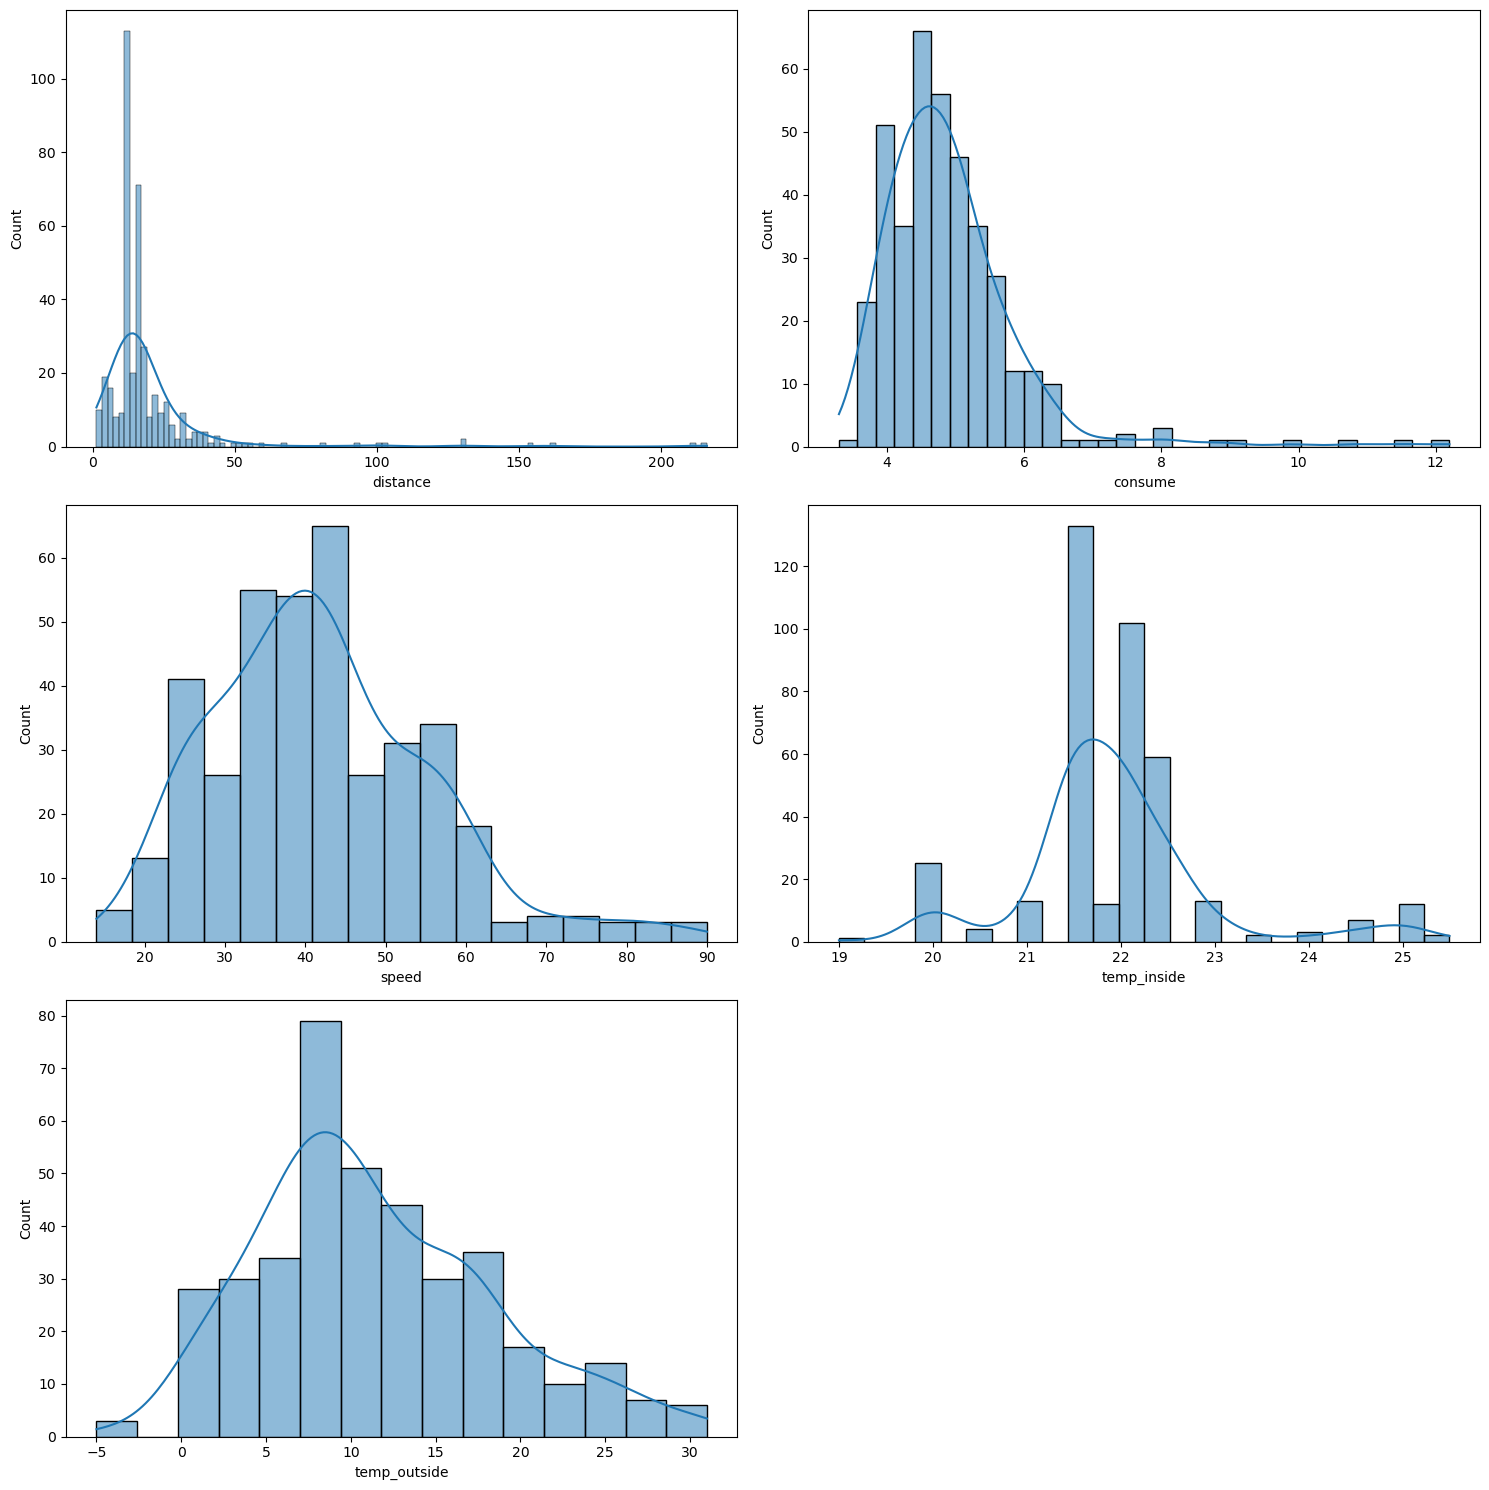

In [26]:
import math
num_cols = 2
num_rows = math.ceil(len(df_num.columns) / num_cols)

# Create subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Plot each column separately
for i, column in enumerate(df_num.columns):
    sns.histplot(data=df2, x=column, ax=axes[i], kde=True)

# Hide any empty subplots
for j in range(len(df_num.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [27]:
enumerate(df_num.columns)

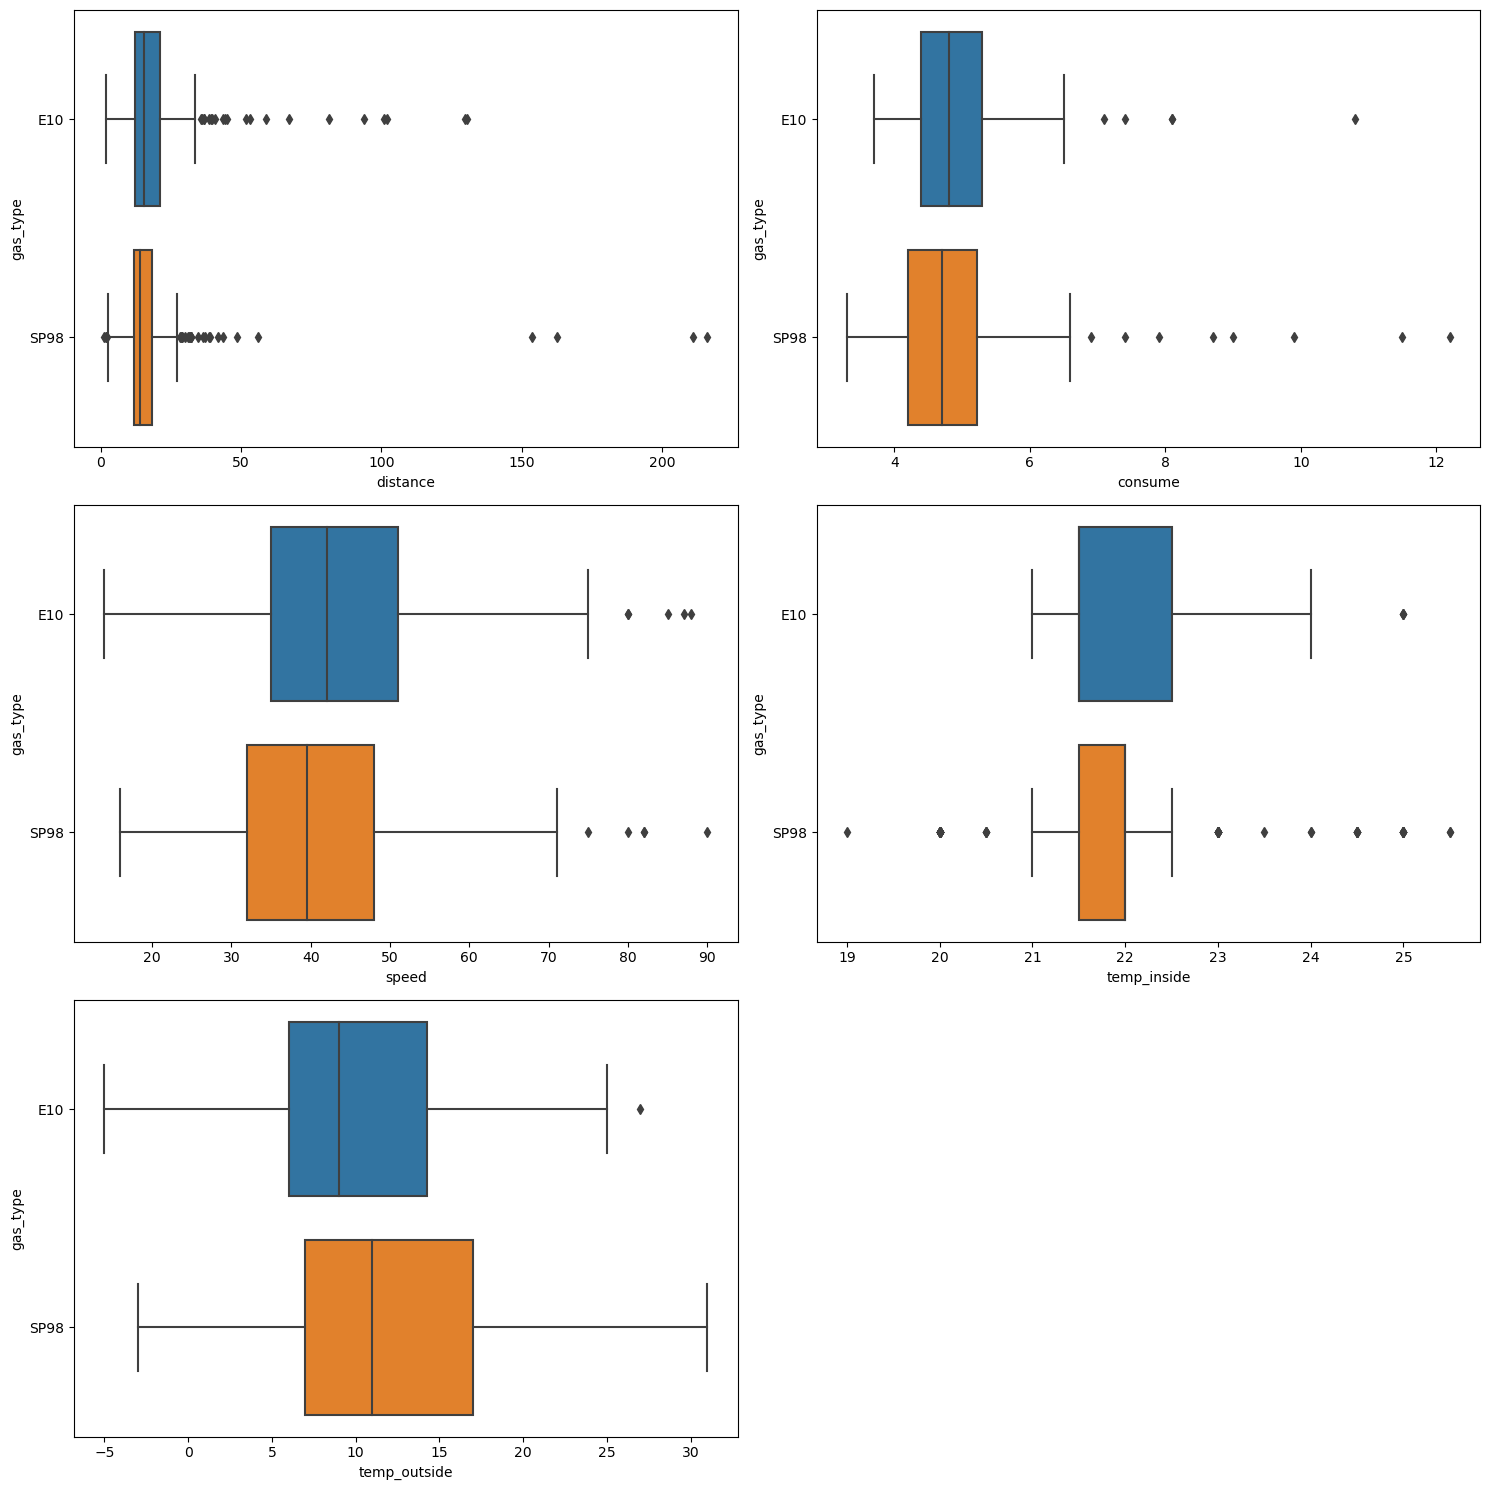

In [28]:
# we get a good overview of the general distribution. however lets compare between the two gas types.
# when putting gas types on "hue" we will not see the clear differences as the data set is imbalanced.
# lets try to compare with boxplots

num_cols = 2  # Assuming you want 2 columns per row
num_rows = math.ceil(len(df_num.columns) / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Plot each column separately
for i, column in enumerate(df_num.columns):
    sns.boxplot(data=df2, x=column, y='gas_type', ax=axes[i])
    
# Hide any empty subplots
for j in range(len(df_num.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We have a couple of outliers in distance especially for SP98 gas. Same applies for consume.

Speed is almost similar for both gas types having only a few outliers.

Temp Inside has a bigger spread due to outliers in SP98.
Temp Outside is similar.

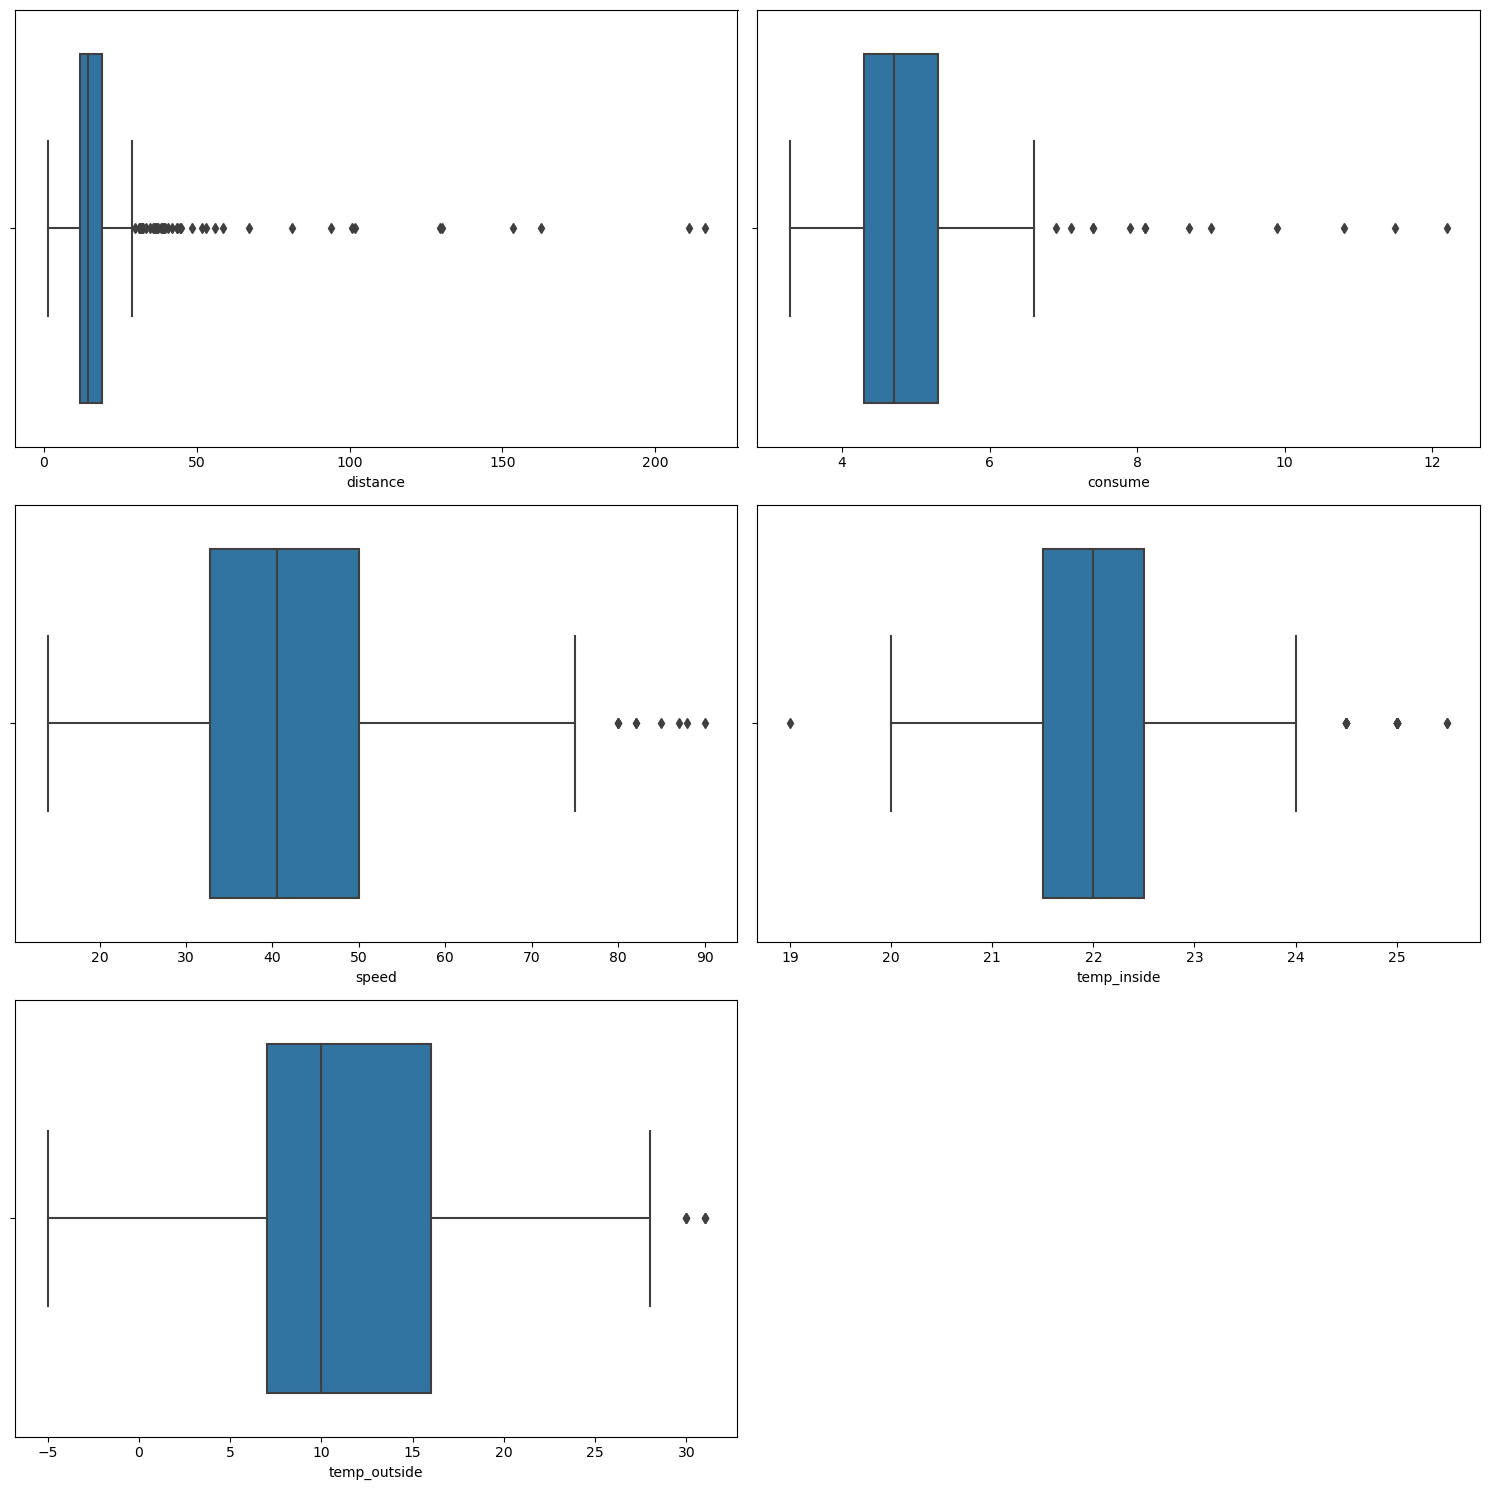

In [29]:
#let's have a look at the boxplots without differentiating between the gas_type

num_cols = 2  # Assuming you want 2 columns per row
num_rows = math.ceil(len(df_num.columns) / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Plot each column separately
for i, column in enumerate(df_num.columns):
    sns.boxplot(data=df2, x=column, ax=axes[i])
    
# Hide any empty subplots
for j in range(len(df_num.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [30]:
df_cat = df2.select_dtypes(exclude=np.number)

In [31]:
for col in df_cat.columns:
    print(col)
    print(df[col].value_counts())

gas_type
gas_type
SP98    228
E10     160
Name: count, dtype: int64
AC
AC
0    358
1     30
Name: count, dtype: int64
rain
rain
0    340
1     48
Name: count, dtype: int64
sun
sun
0    356
1     32
Name: count, dtype: int64


In [32]:
# save cleaned data set

df2.to_csv('./data/cleaned_fuel_consumption.csv')

# Hypthesis Testing

My Hypothesis is that E10 consumes more than SP98.

H0: E10 consume == SP98 consume

H1: E10 consume != SP98 consume

In [33]:
df2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [34]:
consume_e10 = df2[df2['gas_type']=='E10']['consume']
consume_sp98 = df2[df2['gas_type']=='SP98']['consume']

- Use ttest_ind for comparing the means of two independent groups.
- Use ttest_1samp for comparing the mean of a single sample to a known or hypothesized population mean.

Since we are comparing the means of two different gas types (E10 and SP98), the ttest_ind is more appropriate.

In [35]:
import scipy.stats as st

# chose a significance level
alpha = 0.05

# Perform t-test
t_statistic, p_value = st.ttest_ind(consume_e10, consume_sp98, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the difference is significant
if p_value < alpha:
    print("The difference in fuel consumption between E10 and SP98 is statistically significant.")
else:
    print("There is no statistically significant difference in fuel consumption between E10 and SP98.")

T-Statistic: 0.3126464352325148
P-Value: 0.7547214058885283
There is no statistically significant difference in fuel consumption between E10 and SP98.


With a p-value of 0.75, and assuming a significance level of 0.05, there is not enough evidence to reject the null hypothesis. The results are not statistically significant, suggesting that you do not have enough evidence to conclude that the mean consumption of E10 is greater than the known mean consumption of SP98.

H0: E10 consume <= SP98 consume

H1: E10 consume > SP98 consume

In [36]:
t_statistic, p_value = st.ttest_ind(consume_e10, consume_sp98, alternative='greater', equal_var=False)
# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the difference is significant
if p_value < alpha:
    print("There is significant evidence that E10 consumes more than SP98.")
else:
    print("There is no statistically significant evidence that E10 consumes more than SP98.")

T-Statistic: 0.3126464352325148
P-Value: 0.37736070294426416
There is no statistically significant evidence that E10 consumes more than SP98.


## Predictions

Let's try to predict the consume variable.
Before doing that lets translate the `gas_type` into a numerical variable.

In [37]:
df2['gas_type_num'] = df2['gas_type'].apply(lambda x: 0 if x == "E10" else 1)

In [38]:
df_num['gas_type_num'] = df2['gas_type_num']

In [39]:
df_num.corr()

,distance,consume,speed,temp_inside,temp_outside,gas_type_num
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,-0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.148705
gas_type_num,-0.053411,-0.015327,-0.097360,0.010198,0.148705,1.000000


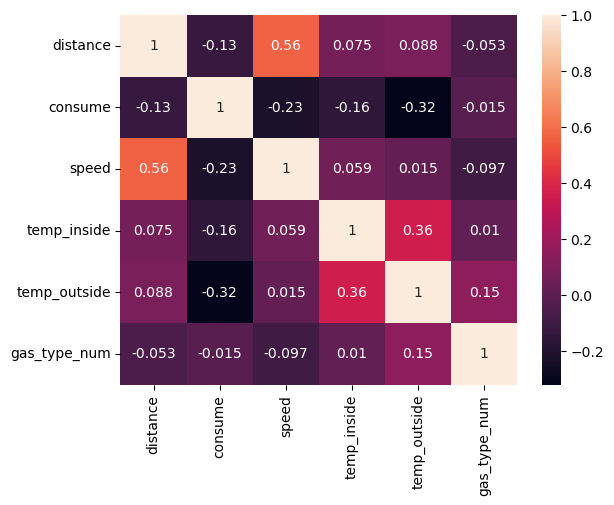

In [40]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()

We can see that consume correlates to some extinct negatively with distance, speed, temp_inside and temp_outside. The impact of gas_type is not really given with only -0.015.

In [41]:
df_num.skew()

distance        5.483256
consume         2.937552
speed           0.753316
temp_inside     1.006163
temp_outside    0.573224
gas_type_num   -0.357409
dtype: float64

In [42]:
df_num.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type_num'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split

X = df_num[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type_num']]
y =  df_num['consume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# transform the columns:
from sklearn.preprocessing import PowerTransformer

to_be_transformed = X_train[['distance', 'speed', 'temp_inside', 'temp_outside']]

transformer = PowerTransformer(method='yeo-johnson')

X_train_transformed = transformer.fit_transform(to_be_transformed)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=to_be_transformed.columns, index=X_train.index)

# transform test set
X_test_transformed = transformer.transform(X_test[['distance', 'speed', 'temp_inside', 'temp_outside']])
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=to_be_transformed.columns, index=X_test.index)

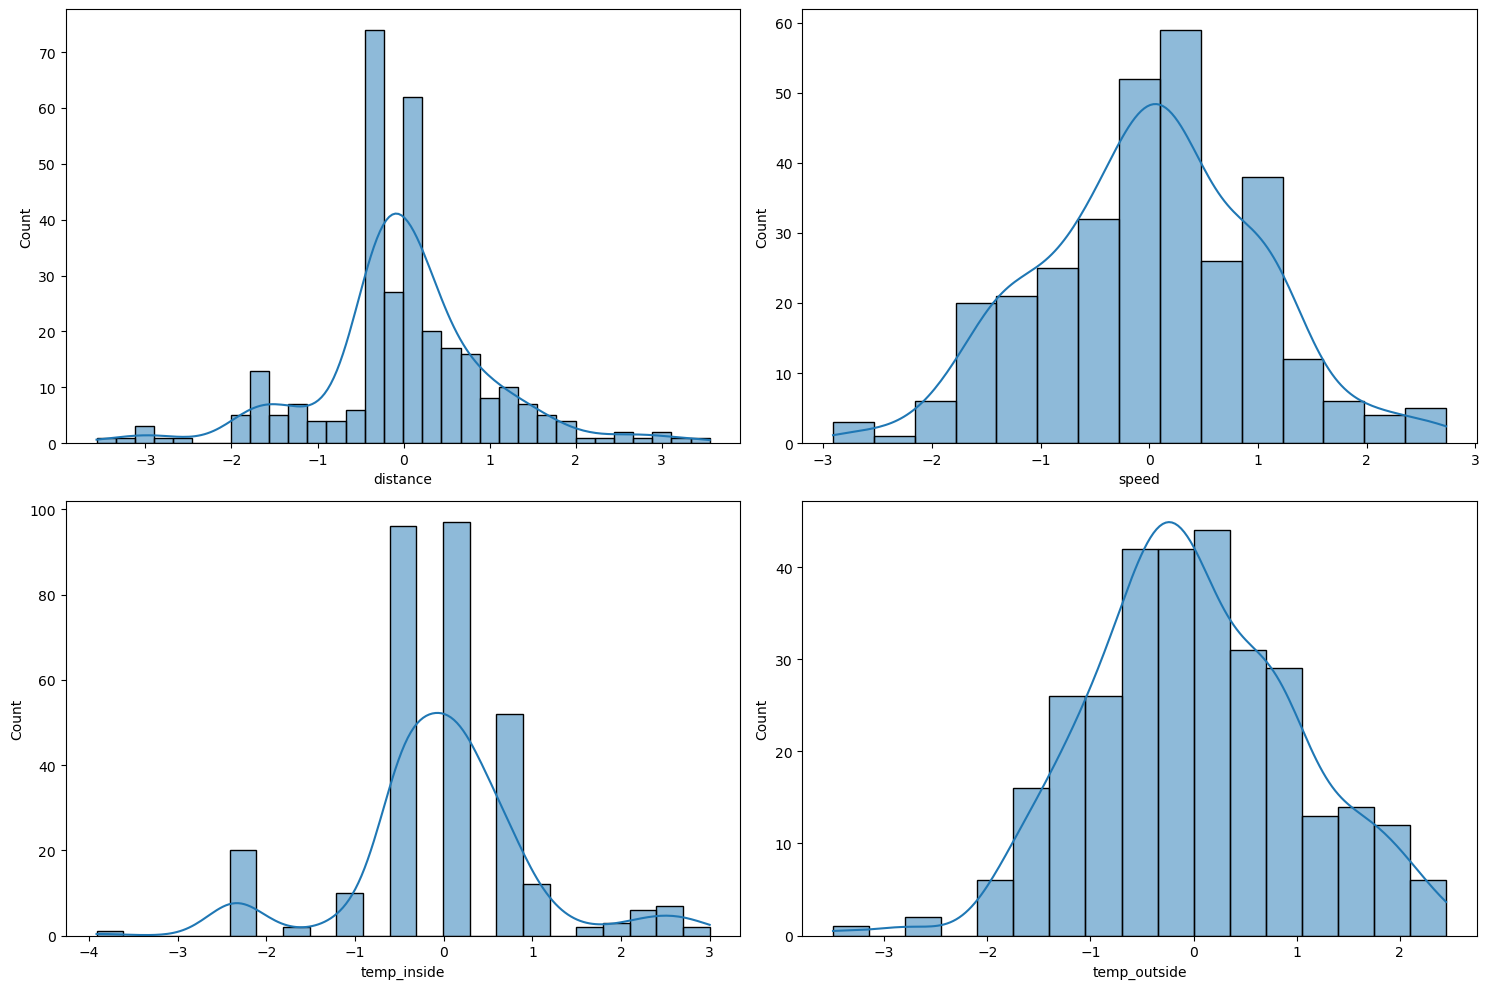

In [45]:
num_cols = 2
num_rows = math.ceil(len(X_train_transformed_df.columns) / num_cols)

# Create subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Plot each column separately
for i, column in enumerate(X_train_transformed_df.columns):
    sns.histplot(data=X_train_transformed_df, x=column, ax=axes[i], kde=True)

# Hide any empty subplots
for j in range(len(X_train_transformed_df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [46]:
#X_train_transformed_df = pd.concat([X_train_transformed_df, X_train['gas_type_num']], axis=1) 
#X_test_transformed_df = pd.concat([X_test_transformed_df, X_test['gas_type_num']], axis=1) 

In [47]:
X_train_transformed_df

,distance,speed,temp_inside,temp_outside
63,-1.202319,-1.306182,-0.421165,-0.726332
238,-0.349441,-0.035969,0.628788,-1.416010
132,0.123213,-0.619468,-0.421165,-0.726332
101,0.842759,1.868807,-1.010507,-0.419967
351,0.113825,0.404897,0.123870,0.804562
...,...,...,...,...
71,-3.019655,-2.016751,-0.421165,-0.129387
106,3.233495,2.064232,1.097303,-1.617780
270,0.113825,0.040873,0.123870,0.148923
348,0.169231,0.674858,0.123870,1.770769


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit-transform train
X_train_scaled = scaler.fit_transform(X_train_transformed_df)

#transform test
X_test_scaled = scaler.transform(X_test_transformed_df)

#cast to pd DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=(X_train_transformed_df.columns), index=X_train_transformed_df.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=(X_test_transformed_df.columns), index=X_test_transformed_df.index)


In [49]:
X_train_scaled_df

,distance,speed,temp_inside,temp_outside
63,0.331979,0.284194,0.505471,0.465842
238,0.451637,0.509347,0.657340,0.349823
132,0.517950,0.405918,0.505471,0.465842
101,0.618902,0.846981,0.420227,0.517380
351,0.516633,0.587493,0.584307,0.723373
...,...,...,...,...
71,0.077009,0.158240,0.505471,0.566262
106,0.954320,0.881622,0.725108,0.315881
270,0.516633,0.522968,0.584307,0.613080
348,0.524407,0.635346,0.584307,0.885911


In [50]:
X_train_scaled_df.describe()

,distance,speed,temp_inside,temp_outside
count,310.000000,310.000000,310.000000,310.000000
mean,0.500664,0.515723,0.566390,0.588028
std,0.140526,0.177543,0.144877,0.168494
min,0.000000,0.000000,0.000000,0.000000
25%,0.451637,0.405918,0.505471,0.491992
50%,0.508541,0.522968,0.584307,0.566262
75%,0.557601,0.635346,0.657340,0.701963
max,1.000000,1.000000,1.000000,1.000000


In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled_df, y_train)

LinearRegression()

In [52]:
y_train_pred = lin_reg.predict(X_train_scaled_df)
y_test_pred = lin_reg.predict(X_test_scaled_df)

In [53]:
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score

def error_metrics(y_train_pred: str, y_test_pred: str):
    """Generate error metrics report based on predictions of the model
    """
    # Evaluate the model
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Create a DataFrame with the error metrics
    error_df = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train],
        'Test': [mae_test, mse_test, rmse_test, r2_test]})

    return error_df

In [54]:
error_metrics(y_train_pred, y_test_pred)

,Metric,Train,Test
0,MAE,0.618667,0.597347
1,MSE,0.779245,0.646214
2,RMSE,0.882749,0.803874
3,R2,0.294271,0.287766


In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
model = rf_reg.fit(X_train, y_train) # performance is not better with transformed & scaled data
    
# Make predictions on the training and test sets
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

In [56]:
error_metrics(y_train_pred, y_test_pred)

,Metric,Train,Test
0,MAE,0.166102,0.430206
1,MSE,0.063903,0.447076
2,RMSE,0.252791,0.668637
3,R2,0.942126,0.507249


In [57]:
names = rf_reg.feature_names_in_
values = rf_reg.feature_importances_

rf_best_features = pd.DataFrame({"Name":names, "value":values})
rf_best_features.sort_values(by="value", ascending=False)

,Name,value
0,distance,0.668803
1,speed,0.148127
3,temp_outside,0.132224
2,temp_inside,0.040229
4,gas_type_num,0.010617
